# Introduction to Python - Lecture 12 (May 12th 2020)

## ---------- Numpy and Pandas (and Matplotlib) in action! ---------

This class will focus on:
    1. Accessing and Indexing data with Numpy and Pandas
    2. Plotting with Matplotlib
    3. Examples on reshaping/filtering/plotting data
## --------------------------------------------------------------------------

Links for this class
<br>

 - Stack Overflow: https://stackoverflow.com/c/nyumc-coding-courses/questions

 - Online Courses Page: http://fenyolab.org/presentations/Bioinformatics_2020/



### Links for this lecture

- Numpy and scipy
https://scipy-lectures.org/
https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html

- Pandas
https://pandas.pydata.org/docs/user_guide/index.html

- Matplotlib
https://matplotlib.org/

- examples for data science based on Numpy and Panda
https://towardsdatascience.com/
https://realpython.com/


### Cheat sheets

+ Numpy
<br>                                 
https://ugoproto.github.io/ugo_py_doc/pdf/Numpy_Python_Cheat_Sheet.pdf



+ Pandas
<br>                      
https://ugoproto.github.io/ugo_py_doc/pdf/pandas-cheat-sheet.pdf
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf



+ matplotlib
<br>   
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf


------

### Recommended Books

+ Vanderplas, Jacob T. **Python data science handbook** : essential tools for working with data. Sebastopol, CA: O'Reilly Media, Inc, 2016. Print.


## 1. Access the data

### 1.1 Access the Elements of an Numpy Array

<br>


In [1]:
import numpy as np
import pandas as pd

##### 1D Array

The basic slice syntax is i:j:k where i is the starting index, j is the stopping index, and k is the step

syntax **array[i:j:k]**

```python    

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

x[3]

x[3:5]

x[3:]

x[:-7]

x[1:7:2]

x[8:2:-2]

```

In [7]:
#type your code here:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

x[3:5]
x[3:]
x[:-7]
x[1:7:2]
x[8:2:-2]


array([8, 6, 4])

##### 2D Array

The general format for indexing is:
+ **array[dim_1, dim_2, dim_3, ..., dim_n]**
+ The format for each dimension follow this format
  + **start:end:step**
+ These can be combined like this:
  + **array[start:end:step, start:end:step, ..., start:end:step]**
  
So given a 2D array here are some indexing examples
```python
lst = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)
```

##### Pulling out the first row
```python
lst[0]
```

##### Pulling out the last row
```python
lst[-1]
```

##### Pulling out the first column (This returns a row vector)
```python
lst[:, 0]
```

##### Pulling out the first column (This returns a column vector)
```python
lst[:, 0:1]
```

**Just like regular lists, a single index drops a single dimension, using ranges maintains dimensions.**

In [9]:
lst = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)
#Pulling out the first row
lst[0]
#Pulling out the last row
lst[-1]
#Pulling out the first column (This returns a row vector)
lst[:, 0]
#Pulling out the first column (This returns a column vector)
lst[:, 0:1]

array([[1],
       [4],
       [7]])

In [13]:
#type your code here:

lst = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)

lst = np.arange(25).reshape(5,5)

print(lst)
lst[0,1]
lst[2:,1]
lst[:, 0:1].T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


array([[ 0,  5, 10, 15, 20]])

### 1.2 Access the Elements/fields of a Pandas DataFrame

#### Accessing rows from the dataframe

Rows are accessed using either **loc** or **iloc**

###### iloc
+ This will access rows depending on their integer index
+ The first row will have index 0
+ Then next will have index 1, ...
+ To extract the first row you would use the following command
    + This will return a series containing the information from that row
```python
df.iloc[0]
```
+ To extract multiple rows you can pass a list of indices
    + This will return a dataframe containing the specified rows
    + The dataframe will be in the order of the indicies
      + \[0, 1, 2\] - original order
      + \[2, 1, 0\] - reversed
      + \[0, 0, 1\] - repeats
      
```python
df.iloc[[0, 1, 2]]
```

In [16]:
#type your code here:

data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}

df = pd.DataFrame.from_dict(data, orient='index')
df
df.iloc[[2,1,0]]

,girth,height,volume
Tree3,8.8,63,10.2
Tree2,8.6,65,10.3
Tree1,8.3,70,10.3


In [18]:
#type your code here:

#Avoid duplicates!
# df.iloc[list(set([0,1,1]))]
df.iloc[[0,1,1]].drop_duplicates()

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3


###### loc

Various arguments will work with loc to extract rows from a dataframe

+ A single index label
    + Returns a series for that specific **row**
    ```python
df.loc["Tree2"]
    ```
+ A list of index labels
    + Returns a dataframe containing those **rows**
    ```python
df.loc[["Tree1", "Tree3"]]
    ```
+ A boolean list
    + Returns a dataframe for **rows** that are labeled true
      + The number of booleans should match the number of rows
      + row 0 - False
      + row 1 - True
      + row 2 - False
    ```python
df.loc[[False, True, False]]
    ```

In [22]:
#type your code here:

# print(df.loc[["Tree1", "Tree3"]])

# print(df.loc[[False, True, False]])

print( df[['volume']] == 10.3)

volume
Tree1    True
Tree2    True
Tree3   False


In [28]:
#type your code here:

print(df)

print(df.loc[[True, True, False]])

filter1 = df['volume'] == 10.3
print(filter1)
filter2 = df['girth'] > 8.5
print(filter1)
print(list(filter1))
print(list(filter2))



girth  height  volume
Tree1    8.3      70    10.3
Tree2    8.6      65    10.3
Tree3    8.8      63    10.2
       girth  height  volume
Tree1    8.3      70    10.3
Tree2    8.6      65    10.3
Tree1     True
Tree2     True
Tree3    False
Name: volume, dtype: bool
Tree1     True
Tree2     True
Tree3    False
Name: volume, dtype: bool
[True, True, False]
[False, True, True]


##### Boolean masks (example: [True, True, False, True]) are a powerful tool to filter Arrays and Dataframe

In [31]:
#type your code here:


s1 = np.arange(0,10,1)>3
s2 = np.arange(0,10,1)>6


print('serie 1  :', s1)
print('serie 2  :', s2)


print('\nresult  &:',s1 & s2)
print('\nresult  |:',~(s1 | s2))



serie 1  : [False False False False  True  True  True  True  True  True]
serie 2  : [False False False False False False False  True  True  True]

result  &: [False False False False False False False  True  True  True]

result  |: [ True  True  True  True False False False False False False]


In [32]:
#type your code here:

print(df)
print(df.loc[[True, True, False]])

filter1 = df['volume'] == 10.3
filter2 = df['height'] > 66

df.loc[ filter1 | filter2]


girth  height  volume
Tree1    8.3      70    10.3
Tree2    8.6      65    10.3
Tree3    8.8      63    10.2
       girth  height  volume
Tree1    8.3      70    10.3
Tree2    8.6      65    10.3


,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3


In [33]:
print(df[['volume']])

volume
Tree1    10.3
Tree2    10.3
Tree3    10.2


## 2. Plots with Matplotlib

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

Matplotlib was originally written by John D. Hunter, has an active development community, and is distributed under a BSD-style license. Michael Droettboom was nominated as matplotlib's lead developer shortly before John Hunter's death in August 2012, and further joined by Thomas Caswell.

As of 23 June 2017, matplotlib 2.0.x supports Python versions 2.7 through 3.6. Python3 support started with Matplotlib 1.2. Matplotlib 1.4 is the last version to support Python 2.6.

Matplotlib has pledged to not support Python 2 past 2020 by signing the Python 3 Statement.

Source: https://en.wikipedia.org/wiki/Matplotlib

### What can Matplotlib Plot

Short answer: Everything

Longer answer: Some plots will require more work than other.

### Why use Matplotlib

Matplotlib is extremely customizable. They provide a framework for generating plots, after the plots have been generated every aspect of the figure can be customized.

Due to this flexibility, many other packages extend Matplotlib such as Seaborn.

### Installing Matplotlib
Matplotlib is not included in the standard python packages so it will need to be installed.

```bash
conda install matplotlib
pip install matplotlib
```

### Importing Matplotlib
Matplotlib is not imported as a whole, instead only the pyplot sub-module is imported. This module contains commands for manipulating figures. It is standard practice to name this import **plt**.

```python
import matplotlib.pyplot as plt
```

### Backends and Renderes
Matplotlib uses different backends for rendering figures. The backend can be changed for different circumstances, but generally can be left with the default. The backend determines which application matplotlib will open to view the figures.

The renderer determines the format of the rendered images eg: svg, png, ps, pdf etc...

When drawing figures within a jupyter notebook a magic function needs to be called so that the figures will appear in the notebook.

```python
%matplotlib inline
```

This is generally called at the end of the import cell at the top of the notebook.
I will also import numpy as we will make use of it throught this section. We will also need to set the seed before generating random numbers so that our random numbers will be the same.

```python
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
```

In [35]:
#type your code here:

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### A simple plot

We can use numpy to generate some a 1D list of random values and visualize this list.

```python
np.random.seed(123454321)
values = np.random.normal(0, 1, size=400)
plt.plot(values)
```

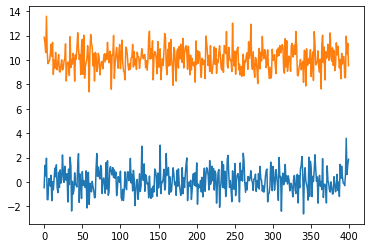

In [40]:
#type your code here:

np.random.seed(123454320)

values = np.random.normal(0, 1, size=400)
_ = plt.plot(values)
_ = plt.plot(values[::-1]+10) # _= is a little trick to keep things neet


The `plot` function will always generate a **line** plot. If a 1D list is provided, the values within the list will determine the y coordinate and the index of the value will determine the x coordinate.

Why does the output show something simlar to this before the plot?
+ \[<matplotlib.lines.Line2D at 0x115a04438>\]

The reason is that every function in python returns something, plot returns a list of lines.
When working in Jupyter the output from the last function/variable is always printed in the cell. In this case that output is the result from running plt.plot(values).

To fix this we need to save the result of that function. In python it is a standard practice to save unused values as an underscore.

```python
_ = plt.plot(values)
```

### 2.1 Providing x coordinates for the list of values

As previously stated, if a list of coordinates is not provided, the index of each value will act as the x-coordinate.

If you would like to map the values to x coordinates then a second list must be provided to the plot function with the same number of elements as the list of values.

```python
plt.plot(x_list, y_list)
```

If the lists are not of equal length then a **ValueError** will be thrown.

`ValueError: x and y must have same first dimension, but have shapes (399,) and (400,)`

#### What does the following line of code do?
```python
_ = plt.plot(np.linspace(-5, 5, len(values)), values)
```

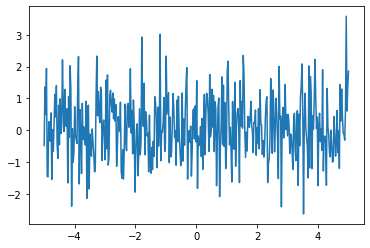

In [41]:
#type your code here:

_ = plt.plot(np.linspace(-5, 5, len(values)), values)

### Adding additional lines to the plot and different plot styles

Additional lines can be plotted by calling the `plt.plot()` function again with the list of new values.

```python
np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

_ = plt.plot(line_1)
_ = plt.plot(line_2)
```

**styles**

- color or c	any matplotlib color

- linestyle or ls	[ '-' | '--' | '-.' | ':' | 'steps' | ...]

- linewidth or lw	float value in points

- marker	     [ '+' | ',' | '.' | '1' | '2' | '3' | '4' ]

- markersize or ms	float

- markevery	[ None | integer | (startind, stride) ]



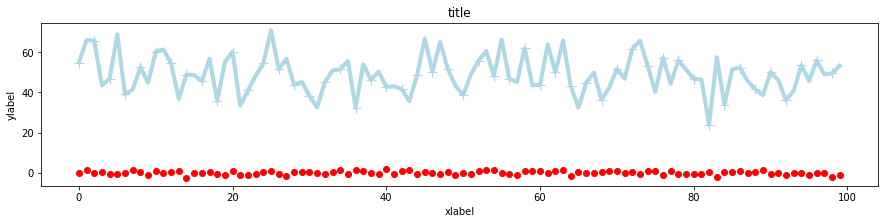

In [44]:
#type your code here:

fig = plt.figure(figsize=[15,3])
np.random.seed(123454321)

line_1 = np.random.normal(0, 1, size=400)[0:100]
line_2 = np.random.normal(50, 10, size=400)[0:100]

plt.plot(line_1, color='red', marker='o',linestyle='')
plt.plot(line_2, color='lightblue', linewidth=4, linestyle='-',markevery =2, marker='+', markersize=10)

plt.title("title")
plt.xlabel("xlabel")
_ = plt.ylabel("ylabel")

### Generating separate plots within the same code block

What if instead of showing both lines on the same plot we would like to show two separate plots?

To fix this we can use the `plt.show()` function. This function will take the currently plot and render it. Once it has been rendered the plot is cleared so that another figure can be rendered.

```python
np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

_ = plt.plot(line_1)
plt.show()
_ = plt.plot(line_2)
plt.show()
```

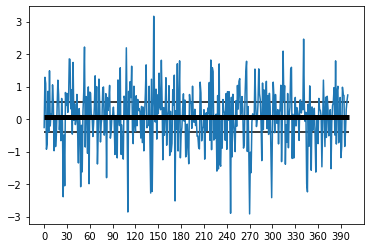

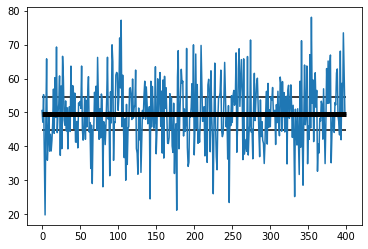

In [47]:
#type your code here:

#np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

def horiz_lines(line):
    plt.hlines(line.mean(),0,len(line), linewidth=5, zorder=3)
    plt.hlines(line.mean()+line.std()/2,0,len(line))
    plt.hlines(line.mean()-line.std()/2,0,len(line))
    

_ = plt.plot(line_1)
plt.xticks(np.arange(0,400,30))

horiz_lines(line_1)
plt.show()
_ = plt.plot(line_2)
horiz_lines(line_2)
plt.show()

#### Simplifying the previous example

The two separate lines can be stored in a single 2D variable.
```python
# [ 
#    [a_0, b_0], 
#    [a_1, b_1],
#    [a_2, b_2],
#      ..., 
#    [a_n, b_n]
# ]
```

Numpy can normally generate multidimensional data using tuples to separate parameters.

In this example the **size** argument is important as we gave 2D tuples, so the size needs to be 2D.

```python
np.random.seed(123454321)
# sample 400 points from two different distributions
# dist_1: mean=0 std=1
# dist_2: mean=50 std=10
points = np.random.normal((0,50), (1,10), size=(400,2))
points
```

And then to plot those points we can pass the single variable
```python
_ = plt.plot(points)
```

[[-2.33006631e-01  5.43361618e-02 -7.50432050e-01 -2.07920767e-01
   5.84130172e-01  7.51642990e-01  6.44625484e-01 -2.71859650e+00
   2.00067664e-01 -3.27794846e-01]
 [ 6.32228063e+01  5.61265075e+01  4.42871045e+01  6.28444235e+01
   3.83457569e+01  4.98773518e+01  6.12810191e+01  5.19016505e+01
   5.52377775e+01  3.80196005e+01]]


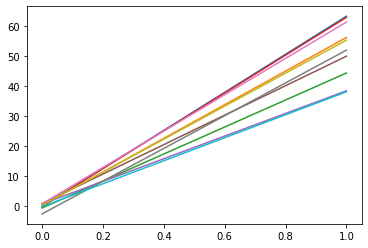

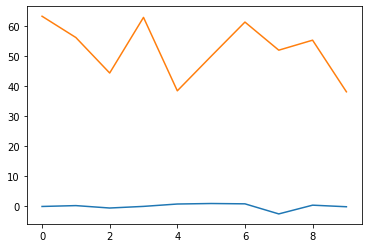

In [63]:
#type your code here:

np.random.seed(123454321)
points = np.random.normal((0,50), (1,10), size=(400,2))

points = points[0:10,:].T

print(points)

_ = plt.plot(points)
plt.show()
_ = plt.plot(points.transpose())
plt.show()
 


#### Scatter plots & Numpy indexing

We could think about the points array as being x, y coordinates for plotting a scatter plot.

Unfortunately if we try to plot the points we get an error due to the scatter function requiring two arguments.

```python
plt.scatter(points)
```

(2, 10) (2,)


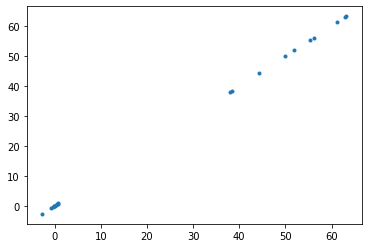

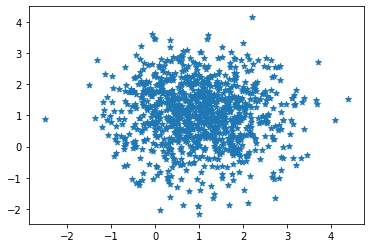

In [68]:
#type your code here:

print(points.shape, points[:,0].shape)
s=1000

_ = plt.scatter(points, points,marker='.')
plt.show()
_=plt.scatter(np.random.normal(1,1,size=s),np.random.normal(1,1,size=s), marker='*')



#### Histogram

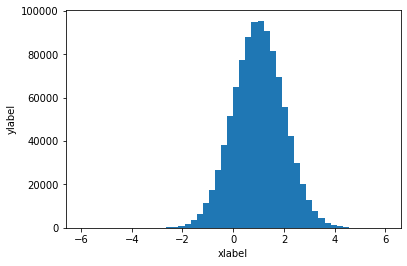

In [73]:
#type your code here:

_ = plt.hist(np.random.normal(1,1,size=1000000),bins=50, range=[-6,6])
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

## 1. Examples

### Example: 2D - rgb image

#### Generate random image data (channels, width, height)
We can generate random noise using the `np.random.randint()` function.
Color images generally have 3 or 4 channels depending on if they are transparent or not.
+ They will always have red, green, and blue value for each x, y coordinate.
+ These values range from 0-255
+ 255 is the largest number that can be made from 8 bits
  + 11111111
  + 128 + 64 + 32 + 16 + 8 + 4 + 2 + 1

##### Lets create some random data
```python
width = 10
height = 10
channels = 3
img = np.random.randint(0, 255, (channels, width, height), dtype=np.uint8)
print(img)
```

In [74]:
#type your code here:

width = 10
height = 10
channels = 3
img = np.random.randint(0, 255, (channels, width, height), dtype=np.uint8)
print(img)

[[[ 47  54  31  90 101  63 226  80  85  33]
  [188 224 142 186  18 140  49 111 153 128]
  [202 152  97 117  51   2  87  12  36 172]
  [116  52 154 208 111  57  85 164 134 184]
  [217  55 111  62   7  40  30 225 182  23]
  [ 77 154 138 248 192   6  69  68 246 130]
  [ 85 132  65  51 142  16 206  41 242  45]
  [252 239   4 154 173 219 213  27 236 229]
  [ 61  79 101 220  69 242  31 156 205  13]
  [  5  40 118 107 198 150 146 224 149  50]]

 [[142 130 219   6  63  85  58  49  79  83]
  [ 78  91 163  74  71 144  38 228  15 176]
  [173  22 187  74  33 213 216  78 177 231]
  [232 193  47 163  99  67 103 126  95 232]
  [ 46  47 200  11 131 179 186 135 181 150]
  [ 44  96 138 125  26  39 254  32  75 133]
  [ 10  79  39 189 120 187 104 115   5 219]
  [131 254 110 148 225 221  89  94   9 149]
  [ 52  29  17  98  19 250 131 208  14 220]
  [117  61  50 224  99 199 107 234 179 162]]

 [[125 147 216  34  53 153   2 126 190  40]
  [  3 242   2  63 170 161  16 234  18  75]
  [  8  33 246 180 200  11 2

#### Viewing images with Matplotlib

Pyplot has a specific function for viewing images called `imshow()`

If we try to plug our image into imshow we will get an error.
+ imshow expects a matrix of shape (width, height, channels)
+ Our img is of the shape (channels, width, height)

To fix this we need to rearrange the order of our dimensions

+ `img.shape` -> (1, 10, 10)
+ 'img = img.transpose(1, 2, 0).shape' -> (10, 10, 1)

#### Plotting the data:
```python
img = img.transpose(1, 2, 0)
plt.imshow(img)
```

In [77]:
img.shape -> (1, 10, 10)
print(img.shape)

SyntaxError: invalid syntax (<ipython-input-77-c1932da68c76>, line 1)

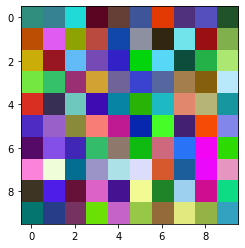

In [76]:
#type your code here:

img = img.transpose(1, 2, 0)

_ = plt.imshow(img)


#### Plotting a single channel

We can use indexing to plot only a single channel from the image

```python
plt.imshow(img[:,:,0])
```

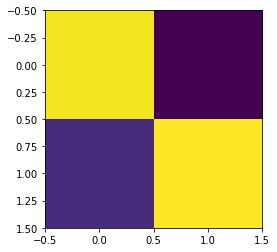

In [81]:
_ = plt.imshow(img[1:3, 1:3,2])

### Example: Add text and legend

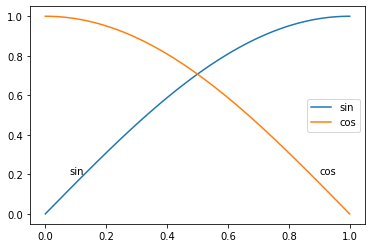

In [82]:
#type your code here:

x = np.linspace(0, 1, 101)

y1 = np.sin(x * np.pi / 2)
y2 = np.cos(x * np.pi / 2)
_ = plt.plot(x, y1, label='sin')
_ = plt.plot(x, y2, label='cos')
_ = plt.text(0.08, 0.2, 'sin')
_ = plt.text(0.9, 0.2, 'cos')
_ = plt.legend()

### Example: Smooth a curve

The **convolution operator** is often seen in signal processing, where it models the effect of a linear time-invariant system on a signal.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

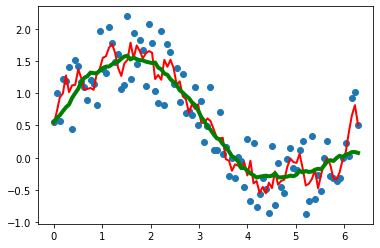

In [86]:
#type your code here:

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 1.2


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


_ = plt.plot(x, y,'o')
_ = plt.plot(x, smooth(y,3), 'r-', lw=2)
_ = plt.plot(x, smooth(y,19), 'g-', lw=4)



 ### Example: Fit a curve

Fitting Parameters: [2.55423706 1.35190947 0.47450618]


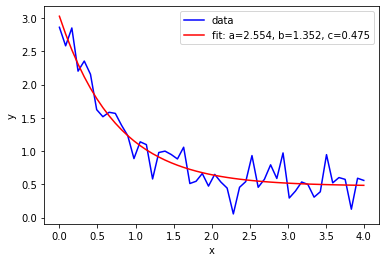

In [91]:
#type your code here:

#example from Scipy
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)

y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
print('Fitting Parameters:', popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





## Example: Toughest Sport: 60 sports ranked across 10 skills

ESPN identified 10 categories, or skills, that go into athleticism, and then asked eight panelists to assign a number from 1 to 10 to the demands each sport makes of each of those 10 skills. By totalling and averaging their responses, we arrived at a degree-of-difficulty number for each sport on a 1 to 100 scale. That number places the difficulty of performing each sport in context with the other sports we rated.


- ENDURANCE: The ability to continue to perform a skill or action for long periods of time. Example: Lance Armstrong
- STRENGTH: The ability to produce force. Example: NFL linebackers.
- POWER: The ability to produce strength in the shortest possible time. Example: Barry Bonds.
- SPEED: The ability to move quickly. Example: Marion Jones, Maurice Green.
- AGILITY: The ability to change direction quickly. Example: Derek Jeter, Mia Hamm.
- FLEXIBILITY: The ability to stretch the joints across a large range of motion. Example: Gymnasts, divers.
- NERVE: The ability to overcome fear. Example: High-board divers, race-car drivers, ski jumpers.
- DURABILITY: The ability to withstand physical punishment over a long period of time. Example: NBA/NHL players.
- HAND-EYE COORDINATION: The ability to react quickly to sensory perception. 
- ANALYTIC APTITUDE: The ability to evaluate and react appropriately to strategic situations.

http://www.espn.com/espn/page2/sportSkills?sort=endurance#grid


```python
import pandas as pd
df = pd.read_excel('https://query.data.world/s/wvouyfvsfnog3bpso66ndbgln3s4y5')
```

In [108]:
#type your code here:

import pandas as pd
df = pd.read_excel('https://query.data.world/s/wvouyfvsfnog3bpso66ndbgln3s4y5')
df=df.set_index('SPORT')

df=df.iloc[1:20,2:8]  # select row and columns

df=df.loc[df['PWR']>7]

In [107]:
#type your code here:

#Panda DataFrames have their own plotting methods
_ = df.apply(np.mean, axis=1).hist() #average per line
plt.title("average per sport")
plt.show()

_ = df.apply(np.mean, axis=0).hist() #average per column
plt.title("average per aptitute")
plt.show()

Histogram can be called as a function plt.hist() or a method df.hist()
plt.hist(df.apply(np.mean, axis=0))
plt.title("average per aptitute")
plt.show

# _ = df.hist()
# plt.show()


SyntaxError: invalid syntax (<ipython-input-107-65ccb399d6d6>, line 12)

### Next lecture on Thursday: Numpy, Pandas, Matplotlib, Seaborn